In [123]:
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import logistic
import scipy.stats as scp
import numpy as np
import os
import matplotlib.pyplot as plt
from random import randrange

mpath='D:/Rankcities/RankDiversity/results/rankDiversity/'
mpathD='D:/Rankcities/RankDiversity/data/'
'''mpath='/Users/casa/RankDiversity/results/rankDiversity/'
mpathD='/Users/casa/RankDiversity/data/'''
#df.iloc[0:10].sort_values(by=['2002'],ascending=False).head(15)

"mpath='/Users/casa/RankDiversity/results/rankDiversity/'\nmpathD='/Users/casa/RankDiversity/data/"

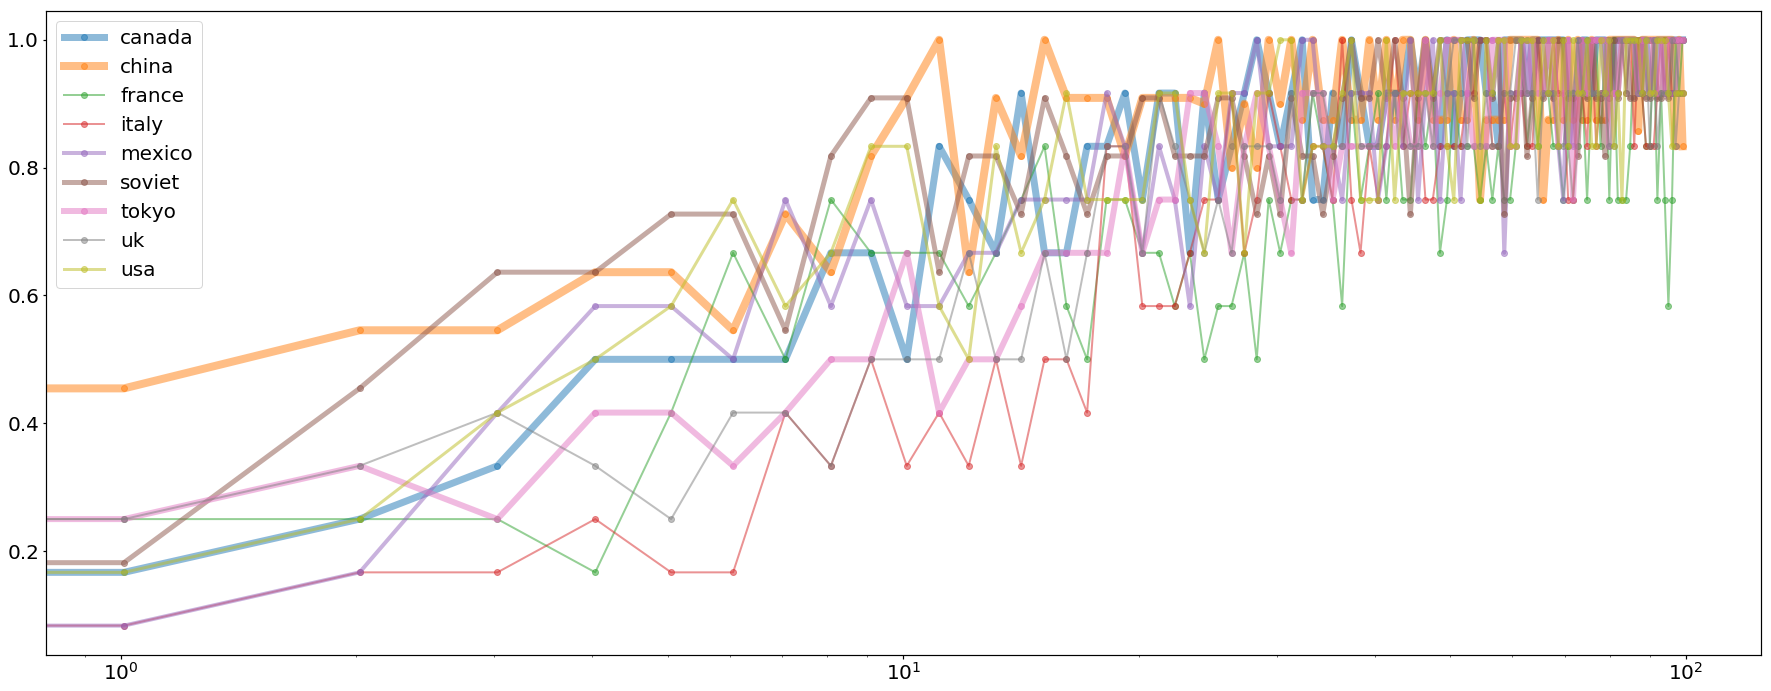

In [89]:
import matplotlib.ticker as ticker
t = np.linspace(0,99, 99)
plt.rcParams['figure.figsize']=(25,10)
plt.rcParams['font.size'] =  20
fg = plt.figure(1); fg.clf()
ax = fg.add_subplot(1, 1, 1)
for root, dirs, files in os.walk(mpath):
    for filename in files:
        if not filename.startswith('.'):
            #print(filename)
            df = pd.read_csv(mpath + filename)
            df_obj = df.select_dtypes(['object'])
            df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
            r = []
            for i in range(0,99):
                s=sum(df.iloc[i][::2].value_counts())
                r.append(float(len(df.iloc[i][::2].value_counts()))/float(s))
            #m,s = curve_fit(logistic.cdf, range(0,99), r, p0=[0,1])[0]
           # print(m,s)
            '''paramnorm  = curve_fit(norm.cdf, range(0,99), r, p0=[0,1])[0]
            ntest = scp.kstest(r, norm.cdf, args=paramnorm)[0]
            paramexpon  = curve_fit(expon.cdf, range(0,99), r, p0=[0,1])[0]
            etest = scp.kstest(r, expon.cdf, args=paramexpon)[0]
            if (ntest>etest):
                print('normal')
            else:
                print('exp')'''
            
            #ax.plot(expon.cdf(t, mu1, sigma1))
            lw=randrange(1,10)
            
            #ax.plot(t,r,marker='o', markersize=10,linewidth=lw,label=filename[:-4])
            ax.plot(t,r,marker='o', clip_on=True, linewidth=lw, alpha=0.5,label=filename[:-4])
            ax.legend(loc='upper left')
            ax.set_xscale('log')
plt.tight_layout()
plt.savefig(mpath+'all_ranks.png', dpi=150)

In [ ]:
#t = np.linspace(0,99, 99)
#fg = plt.figure(1); fg.clf()
#ax = fg.add_subplot(1, 1, 1)
print(mpath)
df = pd.read_csv(mpath + 'canada.csv')
r = []
a= []
for i in range(0,100):
    s=sum(df.iloc[i][::2].value_counts())
    a.append(df.iloc[i][::2].str.strip().value_counts().index.tolist())
    r.append(float(len(df.iloc[i][::2].str.strip().value_counts()))/float(s))
    #print(i,len(df.iloc[i][::2].str.strip().value_counts()),s)
    #print(df.iloc[i][::2].str.strip().value_counts())
#ax.plot(norm.cdf(t, -5.05387214, 0.159594280977049))
#ax.plot(t,r,'ro')
print(r)
#print(a)

In [ ]:
print(df.iloc[0][::2].str.strip().value_counts())

In [19]:
import csv
mylist = a
with open(mpath+'sovietCitiesPerRank.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    #csvwriter.writerow(['Header1', 'Header2', 'Header3'])
    csvwriter.writerow(mylist)

In [ ]:
uCities=df['city'].append(df['city.1']).append(df['city.2']).append(df['city.3']).append(df['city.4']).append(df['city.5']).append(df['city.6']).append(df['city.7']).append(df['city.8']).append(df['city.9']).append(df['city.10']).append(df['city.11']).unique()
uCities.sort()
uCitiesdic = dict(enumerate(uCities))
uCitiesdic

In [158]:
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [ ]:
#rs=list(map((lambda x: x/0.5),r))
fitting_parameters, covariance = curve_fit(norm.cdf, range(0,99), r, p0=[-1,1])
fitting_parameters

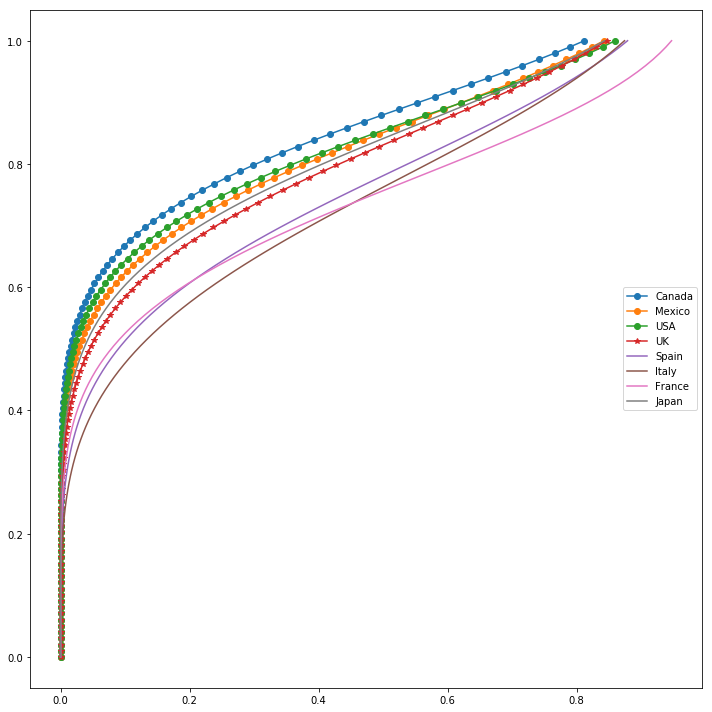

In [127]:
from matplotlib.cm import get_cmap
#import matplotlib as mpl
canadafit = np.asarray([2.11366784871401e-14,2.61170598453265e-12,4.3711937077282e-11,3.22709556882876e-10,1.52142027016354e-09,5.40116685902411e-09,1.57654919740516e-08,3.98748774469477e-08,9.03989412494562e-08,1.87990845228105e-07,3.64568020875998e-07,6.67382774863638e-07,1.16396584871886e-06,1.94802556052426e-06,3.14638473523632e-06,4.92703721854304e-06,7.5084053496912e-06,1.1169879320943e-05,1.62637188502791e-05,2.32283970087217e-05,3.26034653357882e-05,4.50460184985288e-05,6.1348835642764e-05,8.24602741779647e-05,0.000109505989942943,0.00014381255541386,0.000186933044714604,0.000240674650525082,0.000307128393382422,0.000388700978131585,0.000488148845171622,0.000608614455392512,0.000753664836997386,0.000927332409406194,0.00113415808374484,0.00137923662059581,0.00166826420322972,0.00200758815790663,0.00240425872143521,0.00286608271935443,0.00340167897515885,0.00402053522117515,0.00473306622422923,0.00555067277330242,0.00648580110112926,0.00755200222630702,0.00876399060616454,0.0101377013826285,0.0116903453829786,0.0134404609041949,0.015407961163267,0.0176141761363306,0.0200818873371451,0.0228353539010189,0.0259003281451597,0.029304058572635,0.0330752780775359,0.0372441748974215,0.0418423436507053,0.0469027135976963,0.0524594510823894,0.0585478329573879,0.0652040876779198,0.0724652006861579,0.0803686807093854,0.0889522836824352,0.09825369119572,0.108310140686285,0.119158005053248,0.130832320014227,0.143366258349354,0.156790551226711,0.171132858087618,0.186417088107981,0.202662678052771,0.219883833405737,0.238088741975538,0.257278771728171,0.277447667332,0.29858076276356,0.320654230223908,0.343634388445476,0.367477096089997,0.392127258184214,0.417518475221693,0.443572865465526,0.470201090893424,0.497302615905813,0.524766225151293,0.552470822422323,0.580286526395206,0.608076070961839,0.635696508051045,0.663001199308816,0.689842070083916,0.71607208528766,0.741547892465262,0.766132563586534,0.789698354524372,0.812129390921173])
francefit = np.asarray([9.51621338479035e-11,3.60926234460634e-09,3.02724442895235e-08,1.36890308153361e-07,4.41247622294351e-07,1.14815765427486e-06,2.57720331028791e-06,5.19189478711527e-06,9.63005411193424e-06,1.67352852588536e-05,2.75894180401398e-05,4.3545832551595e-05,6.62635824230906e-05,9.77422414911681e-05,0.000140357400869651,0.00019689674235363,0.000270596609974606,0.00036517899447928,0.000484888835571113,0.000634531533901145,0.000819510548945872,0.00104586493996009,0.00132030668502143,0.00165025758766632,0.00204388555163602,0.00251013997170119,0.00305878595233713,0.0037004370261326,0.00444658600023919,0.00530963351196294,0.00630291382390426,0.0074407173350846,0.00873830922758991,0.0102119436088604,0.011878872448458,0.0137573485457054,0.0158666217019562,0.0182269272095739,0.0208594657103546,0.0237863734207476,0.0270306816717214,0.030616264669675,0.0345677743538973,0.0389105612085276,0.0436705798858695,0.0488742785166488,0.054548470625055,0.0607201886360457,0.0674165180635062,0.0746644116045907,0.0824904825420923,0.0909207770770223,0.0999805254814522,0.109693872280365,0.120083586043333,0.131170749793945,0.142974433527462,0.155511350864097,0.168795502453739,0.182837809382699,0.197645740506742,0.213222938336818,0.229568848821253,0.246678361083941,0.264541463872347,0.283142926118358,0.302462009592519,0.322472222108311,0.343141120075572,0.364430169377324,0.386294673517291,0.40868377772247,0.431540557154233,0.454802196554378,0.478400267507312,0.502261108021571,0.526306307319413,0.550453296580323,0.574616043936014,0.598705849299508,0.62263223168562,0.646303898618493,0.669629784115516,0.692520138693492,0.714887651983904,0.736648586000434,0.757723895009761,0.778040306450553,0.797531336551592,0.816138214327574,0.833810688565155,0.850507694304219,0.866197858182007,0.880859825806759,0.894482398979155,0.907064475949589,0.918614793803967,0.9291514782837,0.938701412606142,0.947299442877353])
mexicofit = np.asarray([9.94480783122815e-13,6.98673556821804e-11,8.40449523428025e-10,4.90853866783639e-09,1.92952191367086e-08,5.9045871047389e-08,1.52011584390114e-07,3.44849859873111e-07,7.10275314674466e-07,1.35558681533461e-06,2.43249424988963e-06,4.1482656169819e-06,6.77821300517609e-06,1.06795341954756e-05,1.63065249196621e-05,2.42271751428803e-05,3.51411610162162e-05,4.98992422710448e-05,6.95240727058236e-05,9.52324289455366e-05,0.000128458859722882,0.000170880754416213,0.000224444825347102,0.00029139499324095,0.000374301659122728,0.00047609233857583,0.000600083625537263,0.000750014442421629,0.000930080521126591,0.00114497004512344,0.00139990036611087,0.00170065568932582,0.00205362559926582,0.00246584427197664,0.00294503019088254,0.00349962615006845,0.00413883929165238,0.00487268088211112,0.0057120054858656,0.00666854914284768,0.00775496609996058,0.0089848635841762,0.0103728340374349,0.0119344841605822,0.0136864600354847,0.0156464675115629,0.017833286955811,0.0202667813747334,0.0229678968235496,0.0259586539239081,0.0292621292179111,0.0329024249956631,0.0369046261484065,0.0412947425227261,0.0460996351869478,0.0513469249729814,0.0570648816303191,0.0632822919291859,0.0700283050830431,0.0773322539334447,0.0852234504598425,0.0937309543509159,0.102883313610251,0.112708276475612,0.123232474315361,0.134481075634916,0.14647741188674,0.15924257643392,0.172794998772648,0.187149996973006,0.202319312246923,0.218310630589681,0.235127097554507,0.252766833390471,0.271222456977725,0.290480628199447,0.310521619557836,0.331318928925388,0.352838946268501,0.375040687927179,0.397875612515583,0.421287532652833,0.445212636469584,0.469579632093164,0.494310027027632,0.519318552460579,0.544513740006961,0.569798655224054,0.595071788410214,0.620228098775506,0.645160203124034,0.669759694836747,0.693918573353477,0.717530758730433,0.74049366043978,0.762709764658775,0.784088200166104,0.804546239928071,0.824010693811593,0.842419147866422])
usafit = np.asarray([7.7874736185827e-14,8.10119354438242e-12,1.22604816481534e-10,8.42755173639512e-10,3.75906176980562e-09,1.27543975128344e-08,3.58310350810573e-08,8.76705695608184e-08,1.93027165314009e-07,3.91049556468242e-07,7.40623157662573e-07,1.32682022394042e-06,2.26854305711029e-06,3.7274426664592e-06,5.91819296103261e-06,9.12019840230445e-06,1.36908110116974e-05,2.00801306410828e-05,2.88474604078499e-05,4.06794870952097e-05,5.64102540397116e-05,7.7042991475925e-05,0.000103773866372122,0.000138017710341816,0.000181435780104354,0.00023596560001967,0.00030385293023699,0.000387685896743883,0.000490431310816541,0.000615473194754439,0.000766653517993254,0.000948315132348253,0.00116534687682117,0.00142323080063585,0.00172809142743374,0.00208674695329368,0.00250676223583035,0.00299650339041526,0.00356519376185928,0.00422297098496803,0.00498094478448137,0.00585125509327713,0.00684712998660717,0.00798294283882571,0.00927426800690966,0.010737934231506,0.0123920748208591,0.0142561735455615,0.016351105022685,0.0186991682068763,0.0213241114342606,0.0242511472838392,0.0275069553324707,0.0311196706862664,0.0351188559769538,0.0395354543211997,0.044401720559949,0.0497511279308058,0.0556182471881452,0.0620385950833992,0.0690484490639543,0.0766846250572689,0.0849842152928563,0.0939842832961142,0.103721513483486,0.114231813218175,0.125549865770292,0.137708633385532,0.150738810621863,0.164668229281756,0.179521217661797,0.195317918470565,0.212073571629994,0.229797770266134,0.248493700490715,0.26815737803886,0.288776897406635,0.310331711750996,0.332791964378253,0.356117895036939,0.380259346305032,0.405155396957097,0.430734150132656,0.456912704209766,0.483597333319749,0.510683902230104,0.53805853670373,0.565598565282651,0.593173741669312,0.620647748490873,0.647879973331434,0.674727536718072,0.701047539591827,0.726699485162189,0.751547817544256,0.775464507939819,0.798331609165764,0.820043691918374,0.840510072141099,0.859656739001041])
ukfit = np.asarray([2.59550552178829e-11,1.11845557546235e-09,1.01083335830794e-08,4.8196501029144e-08,1.61872743738512e-07,4.35588349195076e-07,1.00589717612866e-06,2.07688214075937e-06,3.93673628800761e-06,6.97539860894928e-06,1.17031647952383e-05,1.87702067184267e-05,2.89869438686401e-05,4.33452165295748e-05,6.30402148217426e-05,8.94931203350383e-05,0.000124374418141852,0.0001696278366703,0.000227494871288956,0.000300539844525913,0.000391675451597651,0.000504188734313671,0.000641767419389639,0.000808526548670133,0.00100903531864817,0.00124834403488291,0.00153201107336729,0.00186612972549242,0.00225735478590757,0.00271292872320469,0.00324070725189428,0.00384918410053502,0.00454751474509899,0.00534553884869425,0.00625380111865375,0.00728357025980213,0.00844685566854526,0.00975642147646275,0.011225797514559,0.0128692867305562,0.0147019685519925,0.0167396976479209,0.0189990975022902,0.0214975481733659,0.0242531675766701,0.027284785594899,0.0306119102882672,0.0342546854540623,0.0382338387663556,0.0425706197174759,0.0472867265838465,0.0524042216521099,0.0579454339692777,0.0639328489252255,0.0703889840395966,0.0773362504105333,0.0847967993920919,0.092792354203128,0.101344026335147,0.110472116822174,0.120195902663825,0.130533408954745,0.141501167570086,0.153113963587656,0.165384570991781,0.178323479599701,0.191938615575088,0.206235058340233,0.221214757162157,0.236876251160139,0.253214396952939,0.270220108621158,0.287880115089903,0.3061767404232,0.325087712846914,0.344586008562062,0.364639736555186,0.385212070636053,0.406261234814483,0.427740547847627,0.449598532328336,0.471779093028783,0.494221768349861,0.51686205764962,0.539631825933293,0.562459785890807,0.585272055581629,0.607992788217152,0.630544868513907,0.6528506680332,0.674832849841386,0.696415210786017,0.717523547761098,0.738086532609955,0.758036578870187,0.777310682485469,0.795851217972483,0.813606671408911,0.830532292057318,0.846590645499743])
spainfit = np.asarray([1.60634464634519e-09,3.78783113581108e-08,2.40592425217213e-07,8.93186830760886e-07,2.47061448223711e-06,5.67325961099263e-06,1.14571484215683e-05,2.10615252423832e-05,3.60344127621449e-05,5.8256549231292e-05,8.9963965734601e-05,0.000133769384095573,0.000192682559049296,0.00027012964625955,0.000369971644726363,0.000496521934759663,0.000654562908932307,0.000849361671974837,0.00108668476559113,0.00137281185510002,0.00171454829627206,0.0021192364824905,0.00259476585427235,0.00314958143516018,0.003792690740016,0.00453366888384,0.0053826617014675,0.00635038667097277,0.00744813141647382,0.00868774954946904,0.0100816535920633,0.0116428047107149,0.0133846989757488,0.0153213498501721,0.0174672666016616,0.0198374283243887,0.0224472532530441,0.0253125630505135,0.028449541753656,0.0318746890690859,0.035604767723348,0.0396567445899756,0.0440477253402523,0.0487948823956497,0.0539153759984828,0.059426268263878,0.065344430131206,0.0716864411971596,0.0784684824860414,0.0857062222958396,0.0934146953514767,0.101608175599195,0.110300043088234,0.11950264550732,0.129227155073458,0.139483421608078,0.150279822779654,0.161623112640885,0.173518269740514,0.185968346242742,0.198974319638234,0.212534948777072,0.226646636092244,0.241303298008827,0.256496245644824,0.272214078000504,0.2884425898996,0.305164696983305,0.322360380062115,0.340006651096739,0.358077543003276,0.376544125355843,0.395374547888537,0.414534113475326,0.433985381989724,0.453688306115079,0.473600399791793,0.493676939551828,0.513871198506996,0.534134712231215,0.554417575215027,0.574668765982212,0.594836498353739,0.614868595735909,0.634712884711058,0.654317603635659,0.673631821417967,0.692605861172158,0.711191723044666,0.729343500197522,0.747017781728002,0.764174036217504,0.78077496964664,0.796786851596615,0.812179803984196,0.826928047050224,0.84101009793655,0.854408917935854,0.867112005370636,0.879111432034616])
italyfit = np.asarray([1.3985833170262e-08,2.37449493983902e-07,1.24453306005327e-06,4.03137666889887e-06,1.00319636806045e-05,2.11292982443616e-05,3.96641084073348e-05,6.84419452525554e-05,0.000110739108208679,0.000170307627365642,0.000251379426400458,0.000358669724515536,0.000497379692158566,0.000673198343714585,0.000892303625987043,0.0011613626414692,0.00148753092863241,0.00187845070682469,0.0023422479803397,0.00288752838446079,0.00352337164562296,0.00425932451817951,0.00510539205158493,0.00607202703413832,0.00717011745283324,0.00841097180342433,0.00980630208066482,0.0113682042759309,0.0131091362082849,0.0150418925156092,0.0171795766349547,0.0195355696058795,0.0221234955375133,0.0249571835895724,0.0280506263297795,0.0314179343453156,0.0350732870042444,0.0390308792844961,0.0433048646131397,0.0479092936874653,0.0528580492819591,0.0581647770816679,0.0638428126227608,0.0699051044652986,0.076364133771254,0.0832318305125551,0.0905194865891581,0.0982376661956096,0.106396113835865,0.115003660449823,0.124068128180581,0.133596234378092,0.143593495502001,0.154064131653058,0.165010972527581,0.176435365652039,0.188337087813549,0.200714260655847,0.213563271457512,0.226878700148729,0.2406532536529,0.254877708658721,0.269540863935256,0.28462950329571,0.300128370293578,0.316020155696379,0.332285498726166,0.348903002981404,0.365849267861034,0.383098936198067,0.400624758676847,0.41839767545535,0.436386915242323,0.454560111889655,0.472883438354807,0.491321757668315,0.509838790309894,0.52839729715649,0.546959276920206,0.565486176747239,0.583939114405151,0.602279110249475,0.6204673269368,0.638465314645022,0.656235259377516,0.673740231771601,0.690944433707634,0.707813439927921,0.724314431828335,0.740416420583604,0.756090456812241,0.771309824080946,0.786050213691686,0.800289878387477,0.81400976285351,0.827193609176258,0.839828035750593,0.851902588488833,0.863409763579832,0.874345001463635])
japanfit = np.asarray([5.83464950931248e-12,3.14207535791918e-10,3.23522689488501e-09,1.69207035634837e-08,6.10577663326642e-08,1.74223418561183e-07,4.22778255655207e-07,9.11213293202587e-07,1.79388388119878e-06,3.28807742740756e-06,5.68837037061272e-06,9.38223605549099e-06,1.4866869661345e-05,2.2767199568801e-05,3.38550567612771e-05,4.90694751872666e-05,6.9538096518382e-05,9.65996524402768e-05,0.000131827496486586,0.00017705415541978,0.000234396867204785,0.000306284068619987,0.000395482790398072,0.000505126911363803,0.000638746215202277,0.000800296184102891,0.000994188452424824,0.00122532183055475,0.0014991137941058,0.00182153231636375,0.00219912790224602,0.0026390656598275,0.00314915722053717,0.00373789229128473,0.00441446959089695,0.00518882688921514,0.0060716698299429,0.00707449917779497,0.00820963608669388,0.00949024493876231,0.0109303532538184,0.0125448681162416,0.0143495885107933,0.0163612129017273,0.0185973413309517,0.0210764712518913,0.0238179862570578,0.0268421368003554,0.0301700119612891,0.0338235012491942,0.0378252454033544,0.0421985751116978,0.046967436549229,0.0521563026303758,0.0577900688801868,0.063893932861325,0.070493256150806,0.0776134079464356,0.0852795895020398,0.0935166387470959,0.102348814644437,0.111799561083362,0.121891250398386,0.132644906949178,0.144079911597279,0.156213688371334,0.169061375124675,0.182635480555598,0.196945530577657,0.211997707688874,0.227794487685899,0.24433427879013,0.261611068982322,0.279614088061513,0.298327491630748,0.317730074840007,0.337795024256314,0.358489716649609,0.37977557374547,0.401607982065471,0.423936286815778,0.446703868358609,0.469848309076253,0.493301657385542,0.516990794261134,0.540837905867781,0.564761063786314,0.588674911861531,0.612491455935659,0.636120949710715,0.659472866778592,0.682456945561377,0.704984290627535,0.726968510720798,0.748326871000269,0.768981434592982,0.788860166756883,0.80789797388955,0.826037649427843,0.843230699473072])

#line_norm = mpl.colors.Normalize(vmin=1900,vmax=2010)

t = np.linspace(0,1, 100)
#j = np.linspace(0,100, 100)
fg = plt.figure(1); fg.clf()
plt.rcParams['figure.figsize']=(15,15)
#cmap = get_cmap('inferno')
#norm_value = line_norm(1900)
#col = cmap(norm_value)
ax = fg.add_subplot(1, 1, 1)
ax.plot(canadafit,t,label='Canada',marker='o')

ax.plot(mexicofit,t,label='Mexico',marker='o')
ax.plot(usafit,t,label='USA',marker='o')
ax.plot(ukfit,t,label='UK',marker='*')
ax.plot(spainfit,t,label='Spain')
ax.plot(italyfit,t,label='Italy')
ax.plot(francefit,t,label='France')
ax.plot(japanfit,t,label='Japan')
ax.legend(loc='center right')
plt.tight_layout()
plt.savefig(mpath+'all_ranks_fits.png', dpi=150)

In [ ]:
mpath='/Users/casa/Desktop/rankCities/data/'
df = pd.read_csv(mpath + 'tokyo.csv')
#df.iloc[10][::2].value_counts()
print(df.head())

In [ ]:
#df[df['idcity.1']=='Buffalo'].index[0]
#print(df['city'][0])
#df[df['city']=='Glasgow'].index[0]
df[df['city']=='Aberdare'].index[0]

In [ ]:
mpath='/Users/casa/Desktop/rankCities/data/'
for root, dirs, files in os.walk(mpath):
    for filename in files:
        if not filename.startswith('.'):
            print(filename)
            df = pd.read_csv(mpath + filename)
            df_obj = df.select_dtypes(['object'])
            df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
            uCities=df['city'].append(df['city.1']).append(df['city.2']).append(df['city.3']).append(df['city.4']).append(df['city.5']).append(df['city.6']).append(df['city.7']).append(df['city.8']).append(df['city.9']).append(df['city.10']).append(df['city.11']).unique()
            #uCities.sort()
            uCitiesdic = dict(enumerate(uCities))
            ndf = pd.DataFrame(columns=[df.columns[1::2]])
            r = []
            for i in uCitiesdic.values():
                for j in df.columns[::2]:
                    #print(j,i)
                    try:
                        r.append(df[df[j]==i].index[0])
                    except:
                        r.append(-1)
                #print(r)        
                #print(ndf.columns)
                ndf.loc[i] = r
                r=[]
            #print(ndf)    
            ndf.to_csv(mpath+filename+'r.csv')    

In [29]:
df = pd.read_csv(mpathD + 'soviet.csv')
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
print(df.columns)
uCities=df['city'].append(df['city.1']).append(df['city.2']).append(df['city.3']).append(df['city.4']).append(df['city.5']).append(df['city.6']).append(df['city.7']).append(df['city.8']).append(df['city.9']).append(df['city.10']).append(df['city.11']).unique()
#uCities.sort()
uCitiesdic = dict(enumerate(uCities))
#ndf = pd.DataFrame(columns=[df.columns[1::2]])
ndf = pd.DataFrame(columns=[df.columns])
distf = pd.DataFrame(columns=[df.columns[1::2]])
r = []
c=1
dis=[]
ranki_1=0
for i in uCitiesdic.values():
    for j in df.columns[::2]:
        #print(j,i)
        try:
            rank=df[df[j]==i].index[0]
            r.append(rank)
            r.append(df[df.columns[c]][rank])
            if len(dis):
                if ranki_1!=0:
                    dis.append(ranki_1-rank)
                else:
                    dis.append(rank)
                ranki_1=rank
            else:
                rank=df[df[j]==i].index[0]
                dis.append(rank)
                ranki_1=rank
        except:
            r.append(-1)
            r.append(0)
            dis.append("NA")
        c=c+2
            
    #print(dis)
    ndf.loc[i] = r
    distf.loc[i] = dis
    r=[]
    c=1
    dis=[]
print(mpath)
ndf.to_csv(mpath+'sovietRanks.csv')
distf.to_csv(mpath+'sovietDist.csv')

Index(['city', 'Pop1840', 'city.1', 'Pop1856', 'city.2', 'Pop1897', 'city.3',
       'Pop1926', 'city.4', 'Pop1939', 'city.5', 'Pop1959', 'city.6',
       'Pop1970', 'city.7', 'Pop1979', 'city.8', 'Pop1989', 'city.9',
       'Pop2002', 'city.10', 'Pop2010'],
      dtype='object')
/Users/casa/RankDiversity/results/rankDiversity/


In [ ]:
mpath='/Users/casa/Desktop/rankCities/data/'
df = pd.read_csv(mpath + 'spain.csv')
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
uCities = df.columns[1::2]
for c in uCities:
    uCities=df['city'].append(df['city.1']).append(df['city.2']).append(df['city.3']).append(df['city.4']).append(df['city.5']).append(df['city.6']).append(df['city.7']).append(df['city.8']).append(df['city.9']).append(df['city.10']).append(df['city.11']).unique()

In [ ]:
i=df[df['city.11']=="Edmonton"].index[0]
print(i)
print(df.columns[1::2])
df[df.columns[23]][5]

In [ ]:
mpath='/Users/casa/Desktop/rankCities/data/'
df = pd.read_csv(mpath + 'usaRanks.csv')
#for i in range(0,df.shape[0]):
c=df.columns[0::2]
ndf = pd.DataFrame(columns=[c[1:-1]])
for i in range(0,df.shape[0]):
    r=df[df.columns[0::2]].iloc[i,:][::-1]
    r=r[:-1]
    f=r[0]
'''    m=[]
    for j in r[1:]:
        if f>0:
            m.append((abs(j-f)*100)/f)
        else:
            m.append(0)
        f=j
    ndf.loc[i] = m'''
#ndf.to_csv(mpath+'usaCityPath.csv')

In [16]:
mpath='/Users/casa/Desktop/rankCities/data/'
df = pd.read_csv(mpath + 'usaRanks.csv')
c=df.columns[0::2]
c[1:-1]

Index([u'c1900', u'c1910', u'c1920', u'c1930', u'c1940', u'c1950', u'c1960',
       u'c1970', u'c1980', u'1990', u'2000'],
      dtype='object')

In [ ]:
t = np.linspace(0,12, 12)
plt.rcParams['figure.figsize']=(25,10)
plt.rcParams['font.size'] =  20
fg = plt.figure(1); fg.clf()
ax = fg.add_subplot(1, 1, 1)
r=df[df.columns[0::2]].iloc[0,:][::-1]
r=r[:-1].values
print(r)
ax.plot(t,r,marker='o', markersize=10)

In [22]:
from  geopy.geocoders import Nominatim

In [25]:
geolocator = Nominatim()

latitude is :- 43.850374 
longtitude is:- -79.024658


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


In [100]:
#load each column and the loop over and write city - lat - lon
city ="Las Palmas de Gran Canaria"
country ="Spain"
loc = geolocator.geocode(city+','+ country)
print("latitude is :" ,loc.latitude,"\nlongtitude is:" ,loc.longitude)

latitude is :- 28.128874 
longtitude is:- -15.4349448


In [92]:
df = pd.read_csv(mpath + 'citesSets.csv')
df.shape

(106, 50)

In [95]:
countries=['USA','France']
#countries=['Canada','Spain','Italy','Mexico','UK','Japan',]
n=39
i=0
for country in countries:
    print(country)
    a=df.iloc[:,n].dropna()
    print(n)
    for city in a:
        #city =a[0]
        #country =countries[0]
        loc = geolocator.geocode(city+','+ country)
        #print(city," latitude:" ,loc.latitude," longtitude is:" ,loc.longitude)
        try:
            df.iloc[i,n+1]=loc.latitude
            df.iloc[i,n+2]=loc.longitude
        except:
            df.iloc[i,n+1]=0
            df.iloc[i,n+2]=0
        i=i+1
    n=n+6
    i=0

USA
39
France
45


In [27]:
df = pd.read_csv(mpath + 'distMatrixRank.csv',index_col='country')
df.shape

(8, 8)

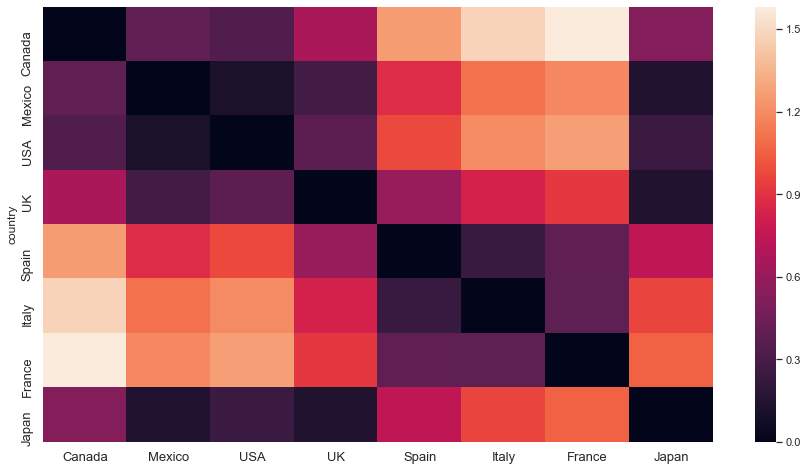

In [46]:
import seaborn as sns; sns.set()
fig = plt.figure(figsize=(15,8))
ax = sns.heatmap(df)
ax.tick_params(labelsize=13)
fig.savefig(mpath+"distMatrixRank.png")

In [221]:
df = pd.read_csv(mpath + 'canadaRanks.csv')
dfcoords = pd.read_csv(mpath + 'citySetcoords.csv')
print(df.columns)
print(dfcoords.columns)
franks = ['canadaRanks.csv','spainRanks.csv','italyRanks.csv','mexicoRanks.csv','ukRanks.csv','japanRanks.csv','usaRanks.csv','franceRanks.csv','sovietRanks.csv']

Index(['cityName', 'city', '1901', 'city.1', '1911', 'city.2', '1921',
       'city.3', '1931', 'city.4', '1941', 'city.5', '1951', 'city.6', 'c1961',
       'city.7', 'c1971', 'city.8', 'c1981', 'city.9', 'c1991', 'city.10',
       '2001', 'city.11', '2011', 'netDistance'],
      dtype='object')
Index(['CanadaSeed', 'GCPNT_LATcs', 'GCPNT_LONcs', 'CanadaEpoch',
       'GCPNT_LATce', 'GCPNT_LONce', 'SpainSeed', 'GCPNT_LATss', 'GCPNT_LONss',
       'SpainEpoch', 'GCPNT_LATse', 'GCPNT_LONse', 'ItalySeed', 'GCPNT_LATis',
       'GCPNT_LONis', 'ItalylEpoch', 'GCPNT_LATie', 'GCPNT_LONie',
       'MexicoSeed', 'GCPNT_LATms', 'GCPNT_LONms', 'MexicoEpoch',
       'GCPNT_LATme', 'GCPNT_LONme', 'UKSeed', 'GCPNT_LATus', 'GCPNT_LONus',
       'UKEpoch', 'GCPNT_LATue', 'GCPNT_LONue', 'JapanSeed', 'GCPNT_LATjs',
       'GCPNT_LONjs', 'EpochJapan', 'GCPNT_LATje', 'GCPNT_LONje', 'USASeed',
       'GCPNT_LATuss', 'GCPNT_LONuss', 'USAEpoch', 'GCPNT_LATuse',
       'GCPNT_LONuse', 'FranceSeed', 'GCPNT_LAT

# Net distances

[2.857142857142857, 0.75, 0.75, 13.428571428571429, 2.272727272727273, 4.75, 22.714285714285715, 1.0, 19.4]


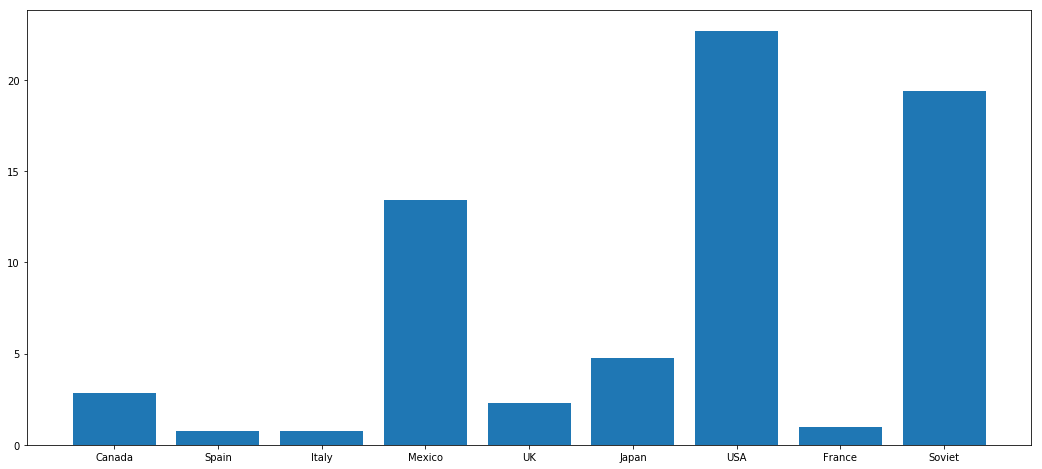

In [128]:
#Seeds - Average
lst = ['CanadaSeed','SpainSeed','ItalySeed','MexicoSeed','UKSeed','JapanSeed','USASeed','FranceSeed','SovietSeed']

'''lst = ['CanadaSeed']
franks = ['canadaRanks.csv']
'''
allcities = []
j=0
for i in lst:
    if i=='SovietSeed':
        lastc = 21
    else:
        lastc = 23
    a=dfcoords[i].dropna().values
    df = pd.read_csv(mpath + franks[j])
    result = 0
    for x in a:
        if x in df['cityName'].values:
            distance = df[df['cityName']==x].values[0]
            #print(distance[1]-distance[lastc])
            result = result + (abs(distance[1]-distance[lastc]))
    j=j+1
    allcities.append(result/len(a))
print(allcities)
lst = ['Canada','Spain','Italy','Mexico','UK','Japan','USA','France','Soviet']
fig = plt.figure(figsize=(18,8))
#r,ax = plt.subplots()
plt.bar(lst, allcities, align='center', alpha=1)
#ax.tick_params(axis='both', labelsize=15)
fig.savefig(mpath+"netdistanceSeeds.png", dpi=150)

[10.4875, 13.4, 13.085714285714285, 9.23076923076923, 13.822222222222223, 14.421052631578947, 15.80188679245283, 10.380434782608695, 16.63157894736842]


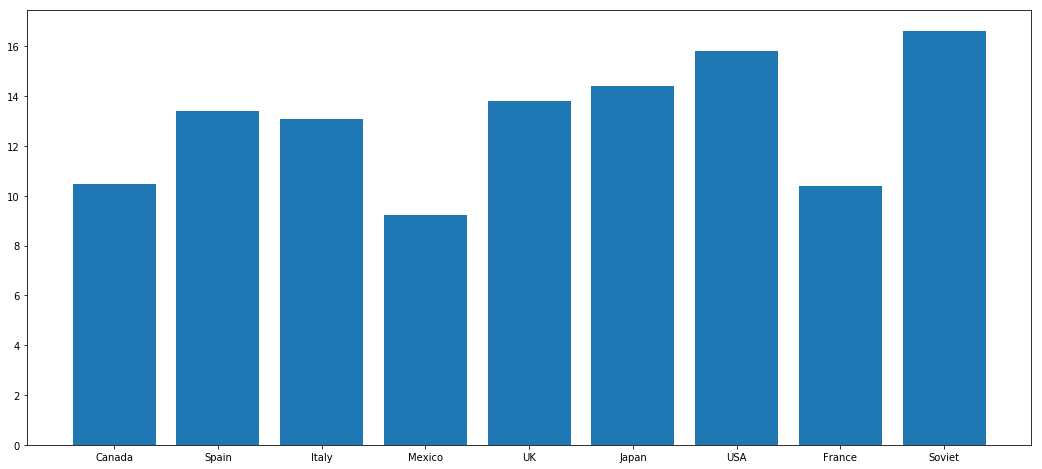

In [137]:
#Epoch - Distribution
lst = ['CanadaEpoch','SpainEpoch','ItalylEpoch','MexicoEpoch','UKEpoch','EpochJapan','USAEpoch','FranceEpoch','SovietEpoch']

allcities = []
allcitiesAvg = []
cityt=[]
j=0
for i in lst:
    if i=='SovietEpoch':
        lastc = 21
    else:
        lastc = 23
    a=dfcoords[i].dropna().values
    df = pd.read_csv(mpath + franks[j])
    result = 0
    for x in a:
        if x in df['cityName'].values:
            distance = df[df['cityName']==x].values[0]
            if -1 not in distance[1::2][:-1]:
            #print(distance[1]-distance[lastc])
                cityt.append(abs(distance[1]-distance[lastc]))
                result = result + (abs(distance[1]-distance[lastc]))
    j=j+1
    allcities.append(cityt)
    allcitiesAvg.append(result/len(a))
    cityt=[]
print(allcitiesAvg)
lst = ['Canada','Spain','Italy','Mexico','UK','Japan','USA','France','Soviet']
fig = plt.figure(figsize=(18,8))
#r,ax = plt.subplots()
plt.bar(lst, allcitiesAvg, align='center', alpha=1)
#ax.tick_params(axis='both', labelsize=15)
fig.savefig(mpath+"netdistanceEpochAvg.png", dpi=150)

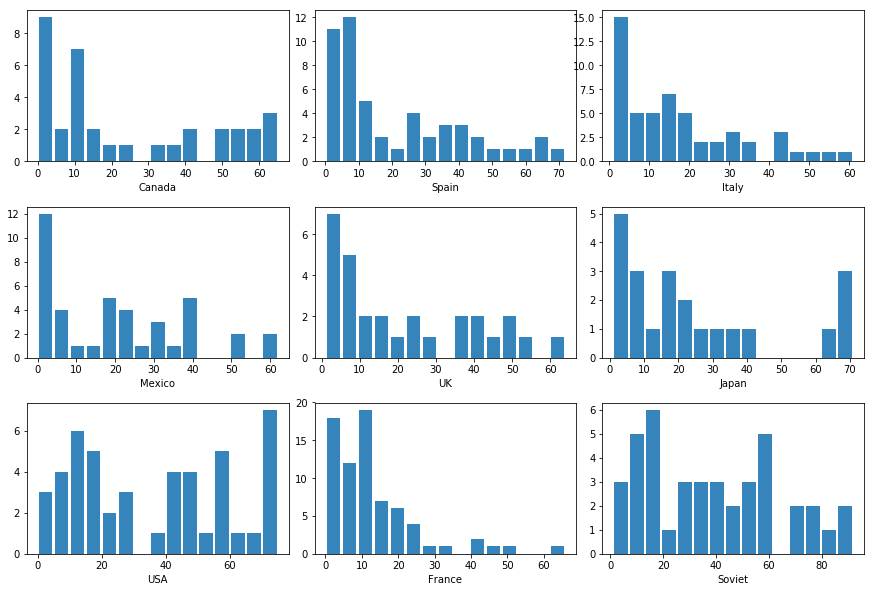

In [158]:
fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.1)
tmp=331
lst = ['Canada','Spain','Italy','Mexico','UK','Japan','USA','France','Soviet']
for i in range(9):
    plt.subplot(tmp)
    plt.hist(allcities[i],bins=15,alpha=0.9, rwidth=0.85)
    plt.xlabel(lst[i])
    tmp=tmp+1
fig.savefig(mpath+"netdistanceEpoch.png", dpi=150)

# Total distance

[7.857142857142857, 7.875, 3.25, 23.142857142857142, 5.909090909090909, 9.666666666666666, 21.857142857142858, 10.166666666666666, 29.8]


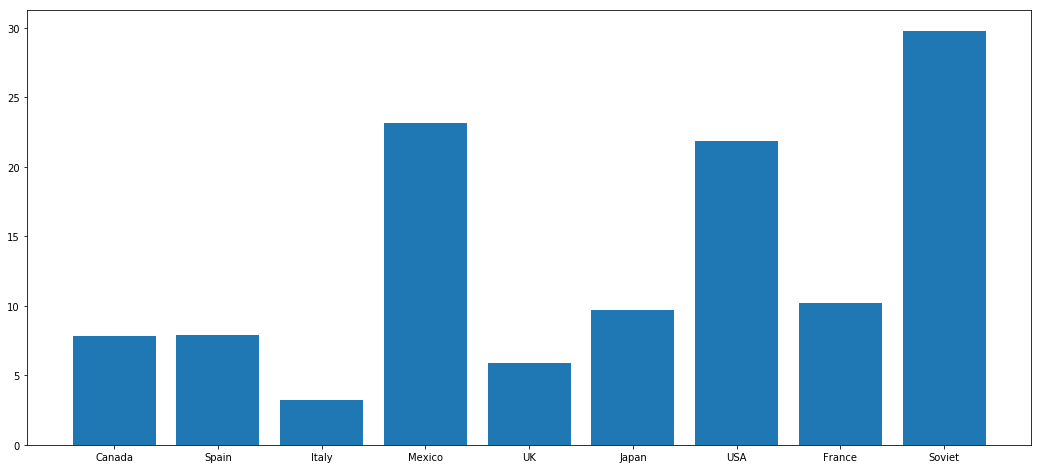

In [179]:
#Seeds
lst = ['CanadaSeed','SpainSeed','ItalySeed','MexicoSeed','UKSeed','JapanSeed','USASeed','FranceSeed','SovietSeed']

def getshift(ranks,t):
    partsum=0
    r=10
    if t==1:
        r=9
    for i in range(0,r):
        partsum=partsum + abs(ranks[i]-ranks[i+1])
    return partsum

allcities = []
cityt=[]
j=0
t=0
for i in lst:
    if i=='SovietSeed':
        lastc = 21
        t=1
    else:
        lastc = 23
    a=dfcoords[i].dropna().values
    df = pd.read_csv(mpath + franks[j])
    result = 0
    for x in a:
        if x in df['cityName'].values:
            distance = df[df['cityName']==x].values[0]
            distance =  distance[1::2][:-1]
            ranks = [abs(int(x)) for x in distance]
            p=getshift(ranks,t)
            cityt.append(p)
    p = sum(cityt) / len(a)       
    allcities.append(p)
    cityt=[]
    j=j+1
print(allcities)

lst = ['Canada','Spain','Italy','Mexico','UK','Japan','USA','France','Soviet']
fig = plt.figure(figsize=(18,8))
#r,ax = plt.subplots()
plt.bar(lst, allcities, align='center', alpha=1)
#ax.tick_params(axis='both', labelsize=15)
fig.savefig(mpath+"totaldistanceSeeds.png", dpi=150)

[30.925, 32.475, 55.042857142857144, 39.40659340659341, 35.91111111111111, 29.157894736842106, 21.77358490566038, 69.53260869565217, 33.26315789473684]


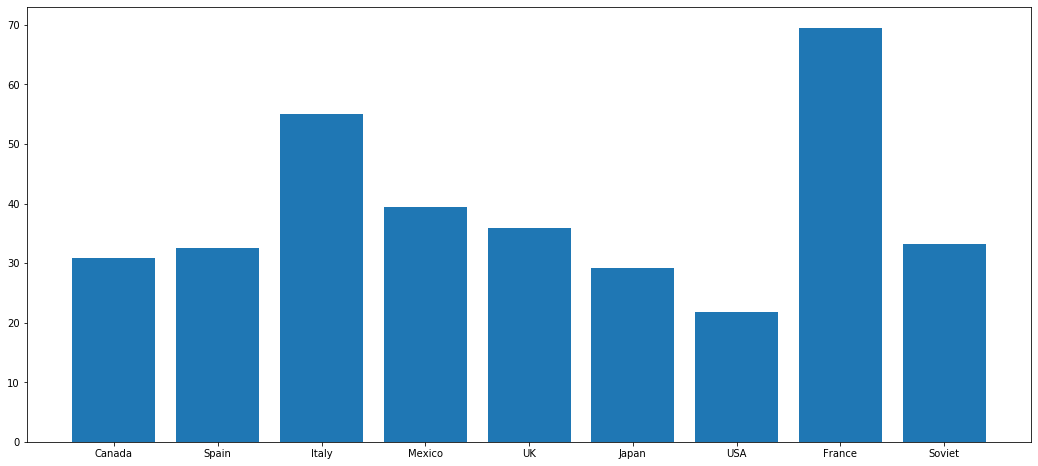

In [46]:
#Epoch
lst = ['CanadaEpoch','SpainEpoch','ItalylEpoch','MexicoEpoch','UKEpoch','EpochJapan','USAEpoch','FranceEpoch','SovietEpoch']

def getshift(ranks,t):
    partsum=0
    r=10
    if t==1:
        r=9
    for i in range(0,r):
        partsum=partsum + abs(ranks[i]-ranks[i+1])
    return partsum

allcities = []
allcitiesAvg = []
cityt=[]
j=0
t=0
for i in lst:
    if i=='SovietEpoch':
        lastc = 21
        t=1
    else:
        d = 23
    a=dfcoords[i].dropna().values
    df = pd.read_csv(mpath + franks[j])
    result = 0
    for x in a:
        if x in df['cityName'].values:
            distance = df[df['cityName']==x].values[0]
            distance =  distance[1::2][:-1]
            if -1 not in distance:
                ranks = [abs(int(x)) for x in distance]
                p=getshift(ranks,t)
                cityt.append(p)
    p = sum(cityt) / len(a)       
    allcities.append(cityt)
    allcitiesAvg.append(p)
    cityt=[]
    j=j+1
print(allcitiesAvg)
lst = ['Canada','Spain','Italy','Mexico','UK','Japan','USA','France','Soviet']
fig = plt.figure(figsize=(18,8))
#r,ax = plt.subplots()
plt.bar(lst, allcitiesAvg, align='center', alpha=1)
#ax.tick_params(axis='both', labelsize=15)
fig.savefig(mpath+"totaldistanceEpochAvg.png", dpi=150)

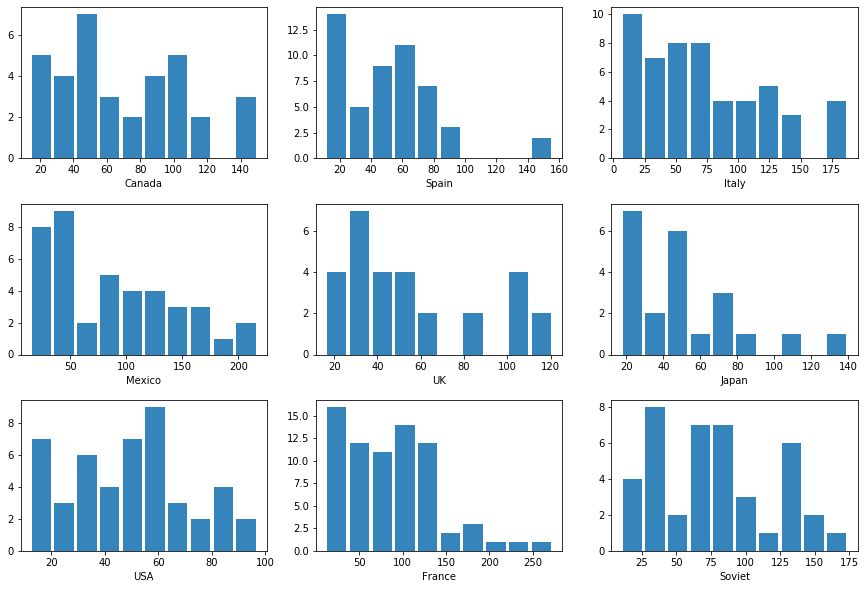

In [49]:
fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
tmp=331
lst = ['Canada','Spain','Italy','Mexico','UK','Japan','USA','France','Soviet']
for i in range(9):
    plt.subplot(tmp)
    plt.hist(allcities[i],bins=10,alpha=0.9, rwidth=0.85)
    plt.xlabel(lst[i])
    tmp=tmp+1
fig.savefig(mpath+"totaldistanceEpoch.png", dpi=150)

# Mean shift

[0.6904761904761904, 0.6875, 0.2708333333333333, 1.9285714285714288, 0.6136363636363638, 0.9652777777777777, 2.0833333333333335, 0.8611111111111112, 2.633333333333333]


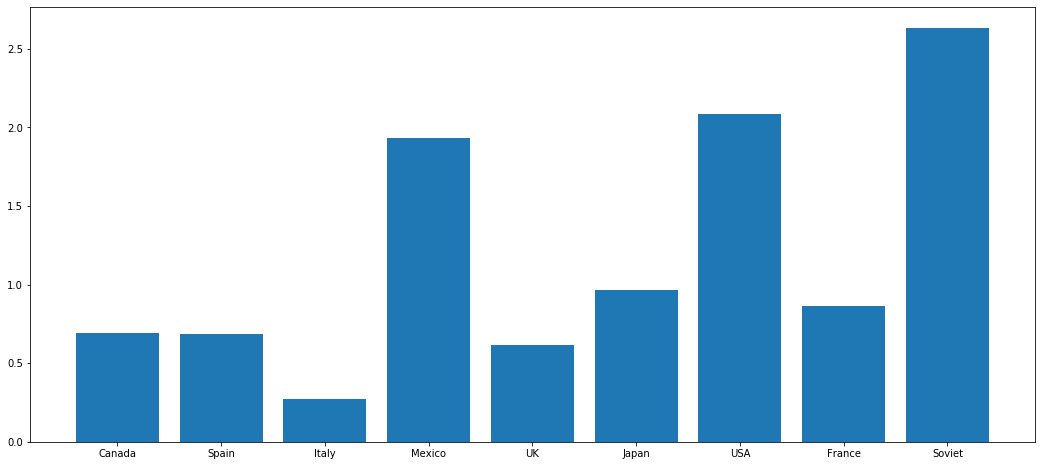

In [66]:
#Seed cities
lst = ['CanadaSeed','SpainSeed','ItalySeed','MexicoSeed','UKSeed','JapanSeed','USASeed','FranceSeed','SovietSeed']
def getshift(ranks,t):
    partsum=[]
    r=12
    if t==1:
        r=11
    for i in range(1,r):
        partsum.append(abs(ranks[i]-ranks[i-1]))
    return partsum
#seed values
allcities=[]
j=0
t=0
for i in lst:
    if i=='SovietSeed':
        lastc = 21
        t=1
    else:
        lastc = 23
    a=dfcoords[i].dropna().values
    df = pd.read_csv(mpath + franks[j])
    q=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for x in a:
        if x in df['cityName'].values:
            distance = df[df['cityName']==x].values[0]#df.netDistance[df['cityName']==x].values[0]
            ranks=distance[1::2]
            #print(ranks)
            p=getshift(ranks,t)
            #print(p)
            q = [x + y for x, y in zip(q, p)]
            #r.append(getshift(ranks))
    result = [x/len(a) for x in q]
    #print(result)
    allcities.append(sum(result)/12)
    j=j+1
#print(sum(result)/12)
print(allcities)
lst = ['Canada','Spain','Italy','Mexico','UK','Japan','USA','France','Soviet']
fig = plt.figure(figsize=(18,8))
#r,ax = plt.subplots()
plt.bar(lst, allcities, align='center', alpha=1)
#ax.tick_params(axis='both', labelsize=15)
fig.savefig(mpath+"meanshiftSeeds.png", dpi=150)

[2.9916666666666667, 2.620833333333333, 4.723809523809524, 3.3516483516483517, 3.140740740740741, 2.921052631578947, 1.5007861635220128, 5.95199275362319, 2.8789473684210525]


<BarContainer object of 9 artists>

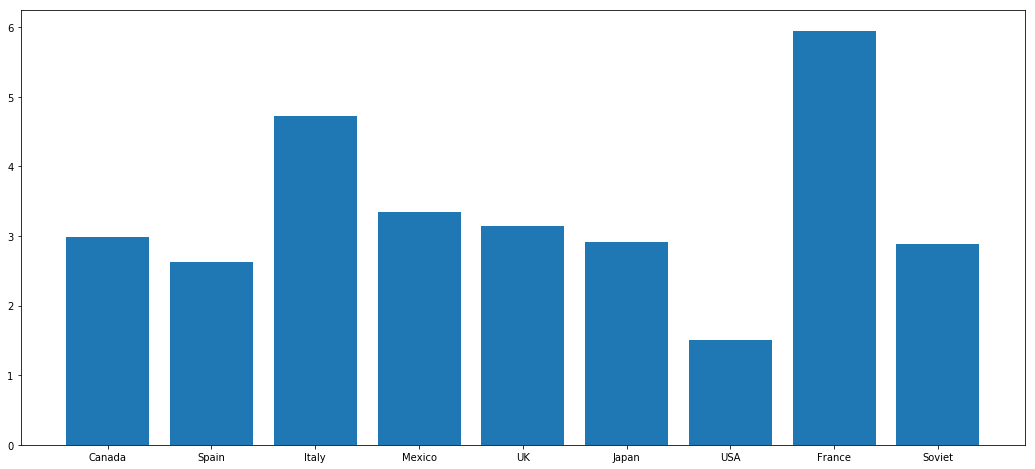

In [251]:
#Epoch cities
lst = ['CanadaEpoch','SpainEpoch','ItalylEpoch','MexicoEpoch','UKEpoch','EpochJapan','USAEpoch','FranceEpoch','SovietEpoch']
def getshift(ranks,t):
    partsum=[]
    r=12
    if t==1:
        r=11
    for i in range(1,r):
        partsum.append(abs(ranks[i]-ranks[i-1]))
    return partsum
#seed values
allcities = []
allcitiesAvg = []
cityt=[]
j=0
t=0
for i in lst:
    if i=='SovietEpoch':
        lastc = 21
        t=1
    else:
        lastc = 23
    a=dfcoords[i].dropna().values
    df = pd.read_csv(mpath + franks[j])
    q=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for x in a:
        if x in df['cityName'].values:
            distance = df[df['cityName']==x].values[0]#df.netDistance[df['cityName']==x].values[0]
            ranks=distance[1::2]
            if -1 not in ranks:
                #print(ranks)
                p=getshift(ranks,t)
                #print(p)
                q = [x + y for x, y in zip(q, p)]
    result = [x/len(a) for x in q]
    allcities.append(result)
    allcitiesAvg.append(sum(result)/12)
    j=j+1
#print(sum(result)/12)
print(allcitiesAvg)
lst = ['Canada','Spain','Italy','Mexico','UK','Japan','USA','France','Soviet']
fig = plt.figure(figsize=(18,8))
#r,ax = plt.subplots()
plt.bar(lst, allcitiesAvg, align='center', alpha=1)
#ax.tick_params(axis='both', labelsize=15)
#fig.savefig(mpath+"meanshiftEpochAvg.png", dpi=150)

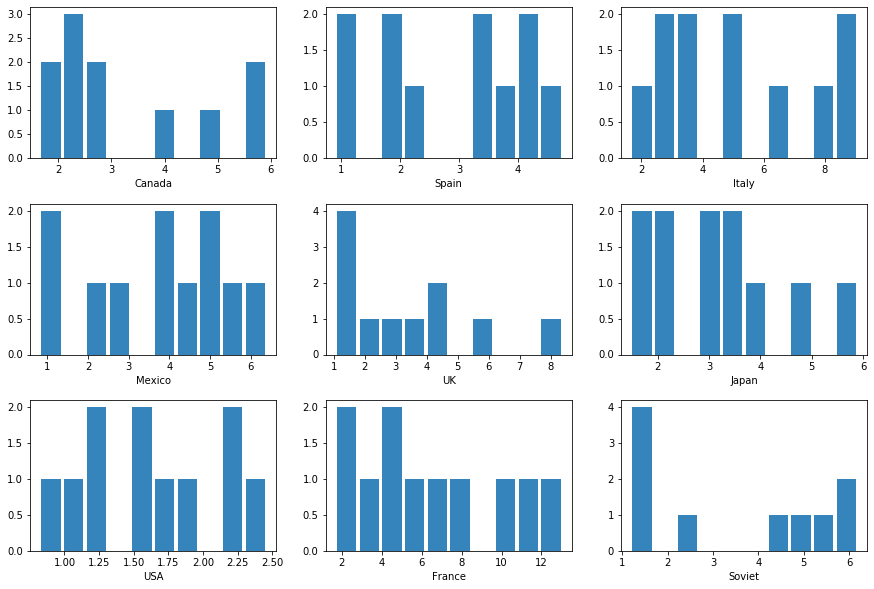

In [75]:
#print(allcities)
fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
tmp=331
lst = ['Canada','Spain','Italy','Mexico','UK','Japan','USA','France','Soviet']
for i in range(9):
    plt.subplot(tmp)
    plt.hist(allcities[i],bins=10,alpha=0.9, rwidth=0.85)
    plt.xlabel(lst[i])
    tmp=tmp+1
fig.savefig(mpath+"meanshiftEpoch.png", dpi=150)

# Rates

In [ ]:
#Seeds
lst = ['CanadaSeed','SpainSeed','ItalySeed','MexicoSeed','UKSeed','JapanSeed','USASeed','FranceSeed','SovietSeed']

def getpop(pop,t):
    partsum=[]
    r=12
    if t==1:
        r=11
    for i in range(1,r):
        try:
            partsum.append(pop[i]/pop[i-1])
        except:
            partsum.append(pop[i]/1)
    return partsum

allcities = []
citiesbyc =[]
j=0
t=0
for i in lst:
    if i=='SovietSeed':
        t=1
    a=dfcoords[i].dropna().values
    #print(a)
    df = pd.read_csv(mpath + franks[j])
    Pt=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for x in a:
        if x in df['cityName'].values:
            distance = df[df['cityName']==x].values[0]
            population=distance[2::2]
            Pt = [x + y for x, y in zip(Pt, population)]

    result=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for x in a:
        if x in df['cityName'].values:
            #print(x)
            print('\'', x,'\'',',')
            distance = df[df['cityName']==x].values[0]
            population=distance[2::2]
            rateP=getpop(population,t)
            shareP=[x / y for x, y in zip(population,Pt)]
            presult=[x * y for x, y in zip(shareP,rateP)]
            result = [x + y for x, y in zip(result, presult)]
            citiesbyc.append(result)
    allcities.append(citiesbyc)
    citiesbyc=[]
    j=j+1 

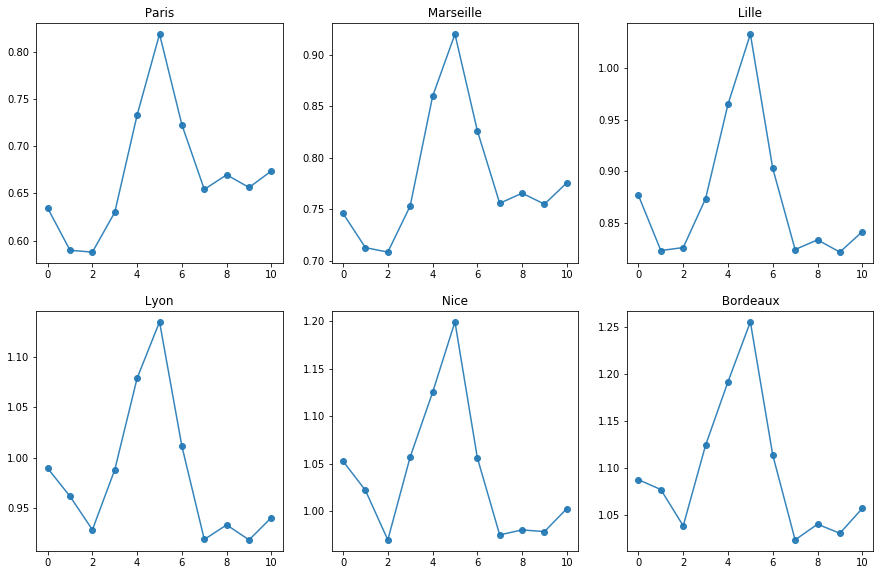

In [245]:
#fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = .3, wspace=.2)
fig = plt.figure()
tmp=331
lst = [' Paris ' ,
' Marseille ' ,
' Lille ' ,
' Lyon ' ,
' Nice ' ,
' Bordeaux ' ]
j=1
p=7
for i in range(0,len(allcities[p])):
    #plt.subplot(tmp)
    ax = fig.add_subplot(3,3,j)
    ax.plot(allcities[p][i],alpha=0.9,marker='o')
    #plt.xlabel(lst[j])
    ax.set_title(lst[j-1])
    j=j+1
    tmp=tmp+1
#fig.savefig(mpath+"rateFranceSeed.png", dpi=150)

In [252]:
#Epoch
lst = ['CanadaEpoch','SpainEpoch','ItalylEpoch','MexicoEpoch','UKEpoch','EpochJapan','USAEpoch','FranceEpoch','SovietEpoch']

def getpop(pop,t):
    partsum=[]
    r=12
    if t==1:
        r=11
    for i in range(1,r):
        try:
            partsum.append(pop[i]/pop[i-1])
        except:
            partsum.append(pop[i]/1)
    return partsum

allcities = []
citiesbyc =[]
j=0
t=0
for i in lst:
    if i=='SovietEpoch':
        t=1
    a=dfcoords[i].dropna().values
    #print(a)
    df = pd.read_csv(mpath + franks[j])
    Pt=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for x in a:
        if x in df['cityName'].values:
            distance = df[df['cityName']==x].values[0]
            population=distance[2::2]
            Pt = [x + y for x, y in zip(Pt, population)]

    result=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for x in a:
        if x in df['cityName'].values:
            #print(x)
            distance = df[df['cityName']==x].values[0]
            population=distance[2::2]
            if -1 not in distance:
                print('\'', x,'\'',',')
                rateP=getpop(population,t)
                shareP=[x / y for x, y in zip(population,Pt)]
                presult=[x * y for x, y in zip(shareP,rateP)]
                result = [x + y for x, y in zip(result, presult)]
                citiesbyc.append(result)
    allcities.append(citiesbyc)
    citiesbyc=[]
    j=j+1 
print(len(allcities[0]))

' Belleville ' ,
' Brantford ' ,
' Calgary ' ,
' Charlottetown ' ,
' Guelph ' ,
' Halifax ' ,
' Hamilton ' ,
' Hull ' ,
' Kingston ' ,
' Lethbridge ' ,
' Levis ' ,
' London ' ,
' Nanaimo ' ,
' New Westminster ' ,
' Niagara Falls ' ,
' Oshawa ' ,
' Peterborough ' ,
' Regina ' ,
' Saguenay ' ,
' Saint-Hyacinthe ' ,
' Saint-Jerome ' ,
' Saint-Thomas ' ,
' Sarnia ' ,
' Saskatoon ' ,
' Sherbrooke ' ,
' St. Johns ' ,
' Stratford ' ,
' Sudbury ' ,
' Sydney ' ,
' Thunder Bay ' ,
' Trois-Rivieres ' ,
' Victoria ' ,
' Waterloo ' ,
' Windsor ' ,
' Albacete ' ,
' Alicante ' ,
' Almeria ' ,
' Badajoz ' ,
' Burgos ' ,
' Cadiz ' ,
' Cartagena ' ,
' Castello de la Plana ' ,
' Cordoba ' ,
' Coruna ' ,
' Donostia-San Sebastian ' ,
' Ferrol ' ,
' Gijon ' ,
' Girona ' ,
' Granada ' ,
' Huelva ' ,
' Jaen ' ,
' Jerez de la Frontera ' ,
' Leon ' ,
' Lleida ' ,
' Logrono ' ,
' Lorca ' ,
' Lugo ' ,
' Manresa ' ,
' Mataro ' ,
' Orihuela ' ,
' Oviedo ' ,
' Palma de Mallorca ' ,
' Palmas de Gran Canaria ' ,
' Pon

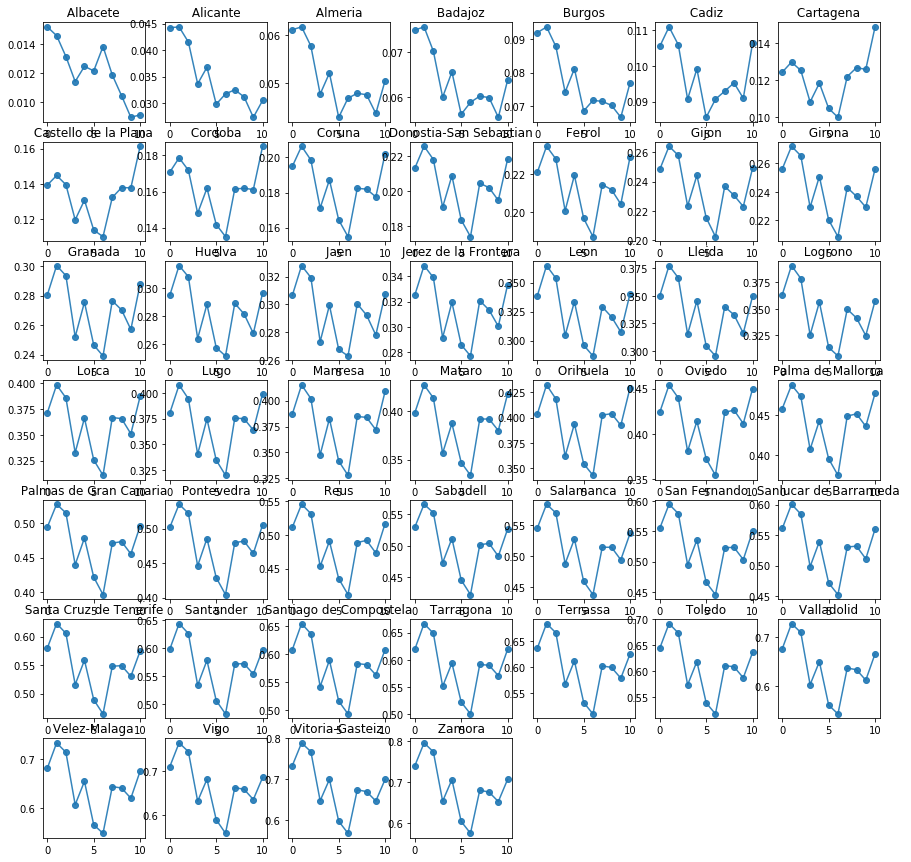

In [256]:
#fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = .3, wspace=.2)
fig = plt.figure()
tmp=331
lst = [' Albacete ' ,
' Alicante ' ,
' Almeria ' ,
' Badajoz ' ,
' Burgos ' ,
' Cadiz ' ,
' Cartagena ' ,
' Castello de la Plana ' ,
' Cordoba ' ,
' Coruna ' ,
' Donostia-San Sebastian ' ,
' Ferrol ' ,
' Gijon ' ,
' Girona ' ,
' Granada ' ,
' Huelva ' ,
' Jaen ' ,
' Jerez de la Frontera ' ,
' Leon ' ,
' Lleida ' ,
' Logrono ' ,
' Lorca ' ,
' Lugo ' ,
' Manresa ' ,
' Mataro ' ,
' Orihuela ' ,
' Oviedo ' ,
' Palma de Mallorca ' ,
' Palmas de Gran Canaria ' ,
' Pontevedra ' ,
' Reus ' ,
' Sabadell ' ,
' Salamanca ' ,
' San Fernando ' ,
' Sanlucar de Barrameda ' ,
' Santa Cruz de Tenerife ' ,
' Santander ' ,
' Santiago de Compostela ' ,
' Tarragona ' ,
' Terrassa ' ,
' Toledo ' ,
' Valladolid ' ,
' Velez-Malaga ' ,
' Vigo ' ,
' Vitoria-Gasteiz ' ,
' Zamora ' ]
j=1
p=1
for i in range(0,len(allcities[p])):
    #plt.subplot(tmp)
    ax = fig.add_subplot(7,7,j)
    ax.plot(allcities[p][i],alpha=0.9,marker='o')
    #plt.xlabel(lst[j])
    ax.set_title(lst[j-1])
    j=j+1
    tmp=tmp+1
#fig.savefig(mpath+"rateFranceSeed.png", dpi=150)

In [128]:
#Epoch
lst = ['CanadaEpoch','SpainEpoch','ItalylEpoch','MexicoEpoch','UKEpoch','EpochJapan','USAEpoch','FranceEpoch','SovietEpoch']

def getpop(pop):
    partsum=[]
    for i in range(1,12):
        partsum.append(pop[i]/pop[i-1])
    return partsum
#df = pd.read_csv(mpath + 'canadaRanks.csv')
a=dfcoords['CanadaEpoch'].dropna().values
#print(len(a))
#count=0
Pt=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#rateP = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
for x in a:
    if x in df['cityName'].values:
        distance = df[df['cityName']==x].values[0]
        #if np.count_nonzero(distance[1::2][:-1] == -1) <6:
        if -1 not in distance[1::2][:-1]:
            population=distance[2::2]
            #print(population)
            #count=count+1
            Pt = [x + y for x, y in zip(Pt, population)]
            #rateP = [x / y for x, y in zip(population,rateP)]
            #print(rateP)
result=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for x in a:
    if x in df['cityName'].values:
        distance = df[df['cityName']==x].values[0]
        #if np.count_nonzero(distance[1::2][:-1] == -1) <6:
        if -1 not in distance[1::2][:-1]:
            population=distance[2::2]
            #print(population)
            rateP=getpop(population)
            shareP=[x / y for x, y in zip(population,Pt)]
            presult=[x * y for x, y in zip(shareP,rateP)]
            result = [x + y for x, y in zip(result, presult)]
print(result)

[1.6201406793088766, 1.272600720486958, 1.1991419969504578, 1.2255406873418084, 1.462032557556083, 1.661596374488689, 1.2908655020130666, 1.2028289997170956, 1.2360563653421701, 1.0930966140791964, 1.1335514970708038]


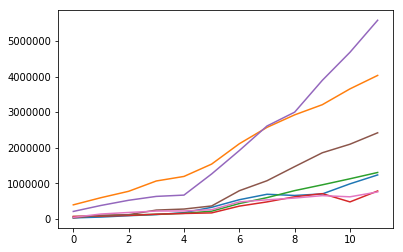

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
r = []
a=dfcoords['CanadaSeed'].dropna().values
for x in a:
    if x in df['cityName'].values:
        distance = df[df['cityName']==x].values[0]#df.netDistance[df['cityName']==x].values[0]
        r=distance[2::2]
        #print(r)
        plt.plot(r)
        #print(distance[0],distance[1],distance[2])
plt.show()

In [101]:
q=[2, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0]
p=[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
s=[2, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0]
t=[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
g=[x + y for x, y in zip(q, p)]
[x + y for x, y in zip(g, s)]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [262]:
a=dfcoords['CanadaEpoch'].dropna().values
df = pd.read_csv(mpath + 'canadaRanks.csv')
result = 0
for x in a:
    if x in df['cityName'].values:
        distance = df[df['cityName']==x].values[0]
        #distance =  distance[1::2][:-1]
        if -1 not in distance:
            print(distance[:-1])

['Belleville' 22 9975 40 11102 45 12229 48 13853 52 15714 68 20529 56
 30751 88 35239 101 34881 102 37243 61 84098 36 104710]
['Brantford' 13 15799 17 23008 17 29430 20 30156 23 31973 25 51653 33
 56779 50 65081 44 90939 45 113674 39 129629 29 139845]
['Calgary' 56 4290 10 43703 8 63312 8 83879 9 88927 7 177938 8 279183 9
 403326 5 626020 4 768650 4 1007469 4 1300352]
['Charlottetown' 16 11476 39 11213 43 12362 51 12459 54 14564 88 16442 90
 19057 97 32063 84 45069 88 57589 86 62539 55 68154]
['Guelph' 18 10676 29 14432 28 18188 31 21113 35 23353 41 35027 41 43784
 45 72973 43 91216 44 114021 38 131172 27 147992]
['Halifax' 6 40822 8 46699 10 58482 12 59340 11 70570 14 90956 10 183936
 17 220438 16 277756 16 325526 13 374410 12 404389]
['Hamilton' 4 52638 5 82096 4 114227 7 115599 5 166324 5 237708 6 395294 7
 495913 9 529406 8 643286 6 697023 8 748208]
['Hull' 17 11309 21 18191 19 24111 21 29412 21 32935 28 48989 32 56905 55
 62823 75 56282 86 60734 81 66246 54 69004]
['Kingston' 12 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

countries = np.random.choice(list("ABCDE"),size=25)
df = pd.DataFrame({"Date" : range(200),
                    'Country' : np.repeat(countries,8),
                    'y1' : np.random.rand(200),
                    'y2' : np.random.rand(200)})

fig = plt.figure()

for c,num in zip(countries, range(1,26)):
    print(c,num)
    df0=df[df['Country']==c]
    ax = fig.add_subplot(5,5,num)
    ax.plot(df0['Date'], df0[['y1','y2']])
    ax.set_title(c)

plt.tight_layout()
plt.show()